# Estágio em Dados - Itaú
Candidato: Gustavo Ribeiro Montes 

E-mail: gustavoribeiromontes@gmail.com

CPF: 437.030.688-41

## Introdução
Objetivo: Descrever qual o tipo de público (considerando gênero e idade) e o canal ideal para vender determinado tipo de produto

Passos:
- Acessar e baixar banco de dados do link: [ecommerce](https://www.kaggle.com/datasets/raziehghahartars/ecommerce)
- Higienizar e normalizar a base, tirando os *missing values*
- Responder a pergunta norteadora a partir de modelos de inferência estatística
- Construir visualizações para a análise

### Observação dos campos do *dataset*

In [232]:
# Importação das bibliotecas utilizadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [233]:
set_data_path = "data\Ecommerce_DBS.csv" # caminho da base de dados
dataset = pd.read_csv(set_data_path)

In [234]:
# Campos da base de dados
dataset.columns 

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'NPS', 'Customer Age ', 'Gender',
       'Source', 'Country', 'State', 'Latitude', 'Longituide'],
      dtype='object')

In [235]:
# Verificar tipos das colunas
dataset.dtypes

Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
NPS                        int64
Customer Age               int64
Gender                    object
Source                    object
Country                   object
State                     object
Latitude                 float64
Longituide               float64
dtype: object

In [236]:
dataset.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Latitude,Longituide
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,4.991832,43.759228,42.400790,-81.648522
std,14428.27959,141.568577,1.414694,1442.933565,3.166732,15.392075,7.214608,37.339110
min,1.00000,10.000000,1.000000,100.000000,0.000000,18.000000,31.169546,-127.647621
25%,12497.75000,132.000000,2.000000,1477.000000,2.000000,30.000000,36.116203,-106.000000
50%,25018.00000,255.000000,3.000000,2724.000000,5.000000,44.000000,42.165726,-74.948051
75%,37506.00000,377.000000,4.000000,3974.000000,8.000000,57.000000,46.250000,-74.948051
max,50000.00000,500.000000,5.000000,5350.000000,10.000000,70.000000,56.415211,98.739075


In [237]:
# Criação de uma coluna datatime like para filtragem de data
dataset['data'] = pd.to_datetime(dataset['Purchase Date'], format='%d/%m/%Y')
dataset['Year'] = dataset['data'].dt.year

## Higienização do dataset

In [238]:
# Verificar colunas, tipos e quantidade de nulos
print(dataset.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  object        
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   NPS                    250000 non-null  int64         
 7   Customer Age           250000 non-null  int64         
 8   Gender                 250000 non-null  object        
 9   Source                 250000 non-null  object        
 10  Country                250000 non-null  object        
 11  State                  250000 non-null  object        
 12  Latitude               250000 non-null  floa

In [239]:
# Nenhum caso nulo
dataset.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
NPS                      0
Customer Age             0
Gender                   0
Source                   0
Country                  0
State                    0
Latitude                 0
Longituide               0
data                     0
Year                     0
dtype: int64

Foi observado que não há linhas com valores nulos para serem tratadas.

## Questões

In [242]:
# DF com as vendas(data, categoria, quantidade)
purchases = dataset[['Purchase Date','Product Category','Quantity', 'Product Price', 'Total Purchase Amount', 'NPS', 'Year', 'data']]
# Criação de uma coluna para medir o preço médio das categorias
purchases['TotalAmount_Qtd'] = purchases['Total Purchase Amount'] / purchases['Quantity']
purchases.head(3)

C:\Users\55119\AppData\Local\Temp\ipykernel_20492\2245273824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['TotalAmount_Qtd'] = purchases['Total Purchase Amount'] / purchases['Quantity']


,Purchase Date,Product Category,Quantity,Product Price,Total Purchase Amount,NPS,Year,data,TotalAmount_Qtd
0,08/09/2020,Electronics,3,12,740,7,2020,2020-09-08,246.666667
1,05/03/2022,Home,4,468,2739,8,2022,2022-03-05,684.750000
2,23/05/2022,Home,2,288,3196,10,2022,2022-05-23,1598.000000


### Produtos mais vendidos nos últimos três anos
Entre 2021 e 2023, os produtos da categoria 'Clothing' foram os mais vendidos, representando mais de 30% do total de vendas no período.

In [243]:
last_years = [2021, 2022, 2023] # lista com os últimos três anos
# Vendas dos últimos três anos(2021, 2022, 2023)
filtered_purchases = purchases[purchases['data'].dt.year.isin(last_years)] # DF com anos filtrados
filtered_purchases.head(2)

,Purchase Date,Product Category,Quantity,Product Price,Total Purchase Amount,NPS,Year,data,TotalAmount_Qtd
1,05/03/2022,Home,4,468,2739,8,2022,2022-03-05,684.75
2,23/05/2022,Home,2,288,3196,10,2022,2022-05-23,1598.00


In [ ]:
last_ys_purchases = filtered_purchases.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).reset_index()
sum_sold_qtd = last_ys_purchases.Quantity.sum()
last_ys_purchases['Rep'] = last_ys_purchases['Quantity'].apply(lambda x: f'{(x / sum_sold_qtd):.2%}')
last_ys_purchases

,Product Category,Quantity,Rep
0,Clothing,164688,30.19%
1,Books,163000,29.88%
2,Electronics,109328,20.04%
3,Home,108509,19.89%


### Produtos mais caros
A média dos preços dos produtos de todas as categorias estão próximas de $254.

Ao filtrar os produtos com preço maior do que a média de $254, foi observado que eles representam 50% dos produtos vendidos.
Assim, foi plotado um gráfico box-plot para observar a distribuição de percos para cada categoria, e foi constatado que eles estão distribuídos equivalentemente.

In [ ]:
prod_price_mean = purchases['Product Price'].mean()
print(f'A média geral do preço dos produtos é igual ${prod_price_mean:.2f}')

A média geral do preço dos produtos é igual $254.66


In [ ]:
exp_prod = purchases.groupby('Product Category')['Product Price'].mean().reset_index()
exp_prod

,Product Category,Product Price
0,Books,254.709152
1,Clothing,254.446264
2,Electronics,254.723364
3,Home,254.841688


In [ ]:
# Vendas com Product Price maior do que $254
filt_exp_prod = purchases[purchases['Product Price'] > 254]

# Agrupando produtos por categoria
group_filt_exp_prod = filt_exp_prod.groupby('Product Category')['Quantity'].sum().reset_index()

# Cálculo das quantidades de produtos vendidos por cada categoria
category_qtd = purchases.groupby('Product Category')['Quantity'].sum().reset_index()

# Calculando a representatividade dos produtos com preço maior do que a média para cada categoria
merged_exp_prod = pd.merge(category_qtd,group_filt_exp_prod, on='Product Category', how='left')
merged_exp_prod['Rep'] = merged_exp_prod['Quantity_y'] / merged_exp_prod['Quantity_x']
merged_exp_prod['Rep'] = merged_exp_prod['Rep'].apply(lambda x: f'{x:.2%}') # formatação de 2 vírgulas

# Renomeando as colunas
merged_exp_prod.rename(columns={
    'Quantity_x': 'Vendidos',
    'Quantity_y': 'Mais caros do que média',
    'Rep': 'Representatividade (%)'
}, inplace=True)

merged_exp_prod

,Product Category,Vendidos,Mais caros do que média,Representatividade (%)
0,Books,223876,112247,50.14%
1,Clothing,225322,112352,49.86%
2,Electronics,150828,75331,49.94%
3,Home,149698,75270,50.28%


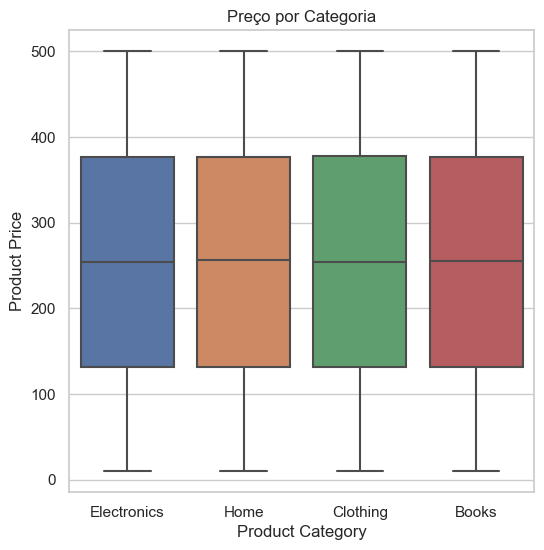

In [ ]:
# Gráfico de distribuição dos preços
sns.set_theme(style="whitegrid")

# boxplot para os preços das categorias
plt.figure(figsize=(6, 6))
sns.boxplot(x='Product Category', y='Product Price', data=purchases)

# Estilização
plt.title('Preço por Categoria')
plt.xlabel('Product Category')
plt.ylabel('Product Price')

# Exibir o gráfico
plt.show()

### Categorias mais vendidas 
Foi verificado que os produtos do setor vestuário e literário foram os mais vendidos, respectivamente, através do período das vendas. Logo, os produtos das categorias Electronics e Home foram os menos vendidos.

Segue as quantidades totais de produtos vendidos por cada categoria.

| **Categoria** | **Quantidade** |
|:-------------:|:--------------:|
|    Clothing   |     164.688    |
|     Books     |     163.000    |
|  Electronics  |     109.328    |
|      Home     |     108.509    |

In [ ]:
category_qtd = purchases.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).reset_index()
category_qtd

,Product Category,Quantity
0,Clothing,225322
1,Books,223876
2,Electronics,150828
3,Home,149698


In [ ]:
most_sold_by_year = purchases.groupby(['Year', 'Product Category'])['Quantity'].sum().reset_index()
most_sold_by_year.head(4)

,Year,Product Category,Quantity
0,2020,Books,60876
1,2020,Clothing,60634
2,2020,Electronics,41500
3,2020,Home,41189


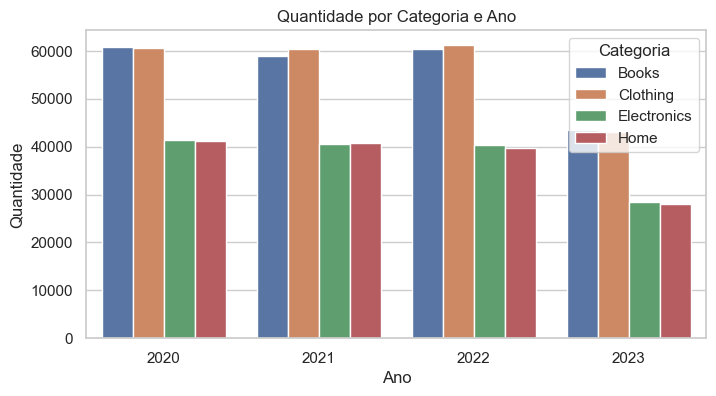

In [ ]:
# Gráfico de barras com as informações das vendas por ano, quantidade e categoria 
plt.figure(figsize=(8, 4))
barra_ = sns.barplot(data=most_sold_by_year, x='Year', y='Quantity', hue='Product Category')

# Estilização
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Quantidade por Categoria e Ano')
plt.legend(title='Categoria')

plt.show()

### Categorias mais caras 
Para calcular os preços das categorias foi considerada a média do Total Purchase Amount sobre Quantity, ou seja, a média do preço total da compra dividido pela quantidade de produtos de cada venda da categoria.

Os produtos de Books possuem a média mais cara igual à $1254.92, enquanto os produtos de Home possuem a menor média de valor_de_venda/qtd. igual à $1239.76.

In [ ]:
most_exp_cat = purchases.groupby('Product Category')['TotalAmount_Qtd'].mean().reset_index()
most_exp_cat

,Product Category,TotalAmount_Qtd
0,Books,1254.921283
1,Clothing,1244.191809
2,Electronics,1240.494393
3,Home,1239.769581


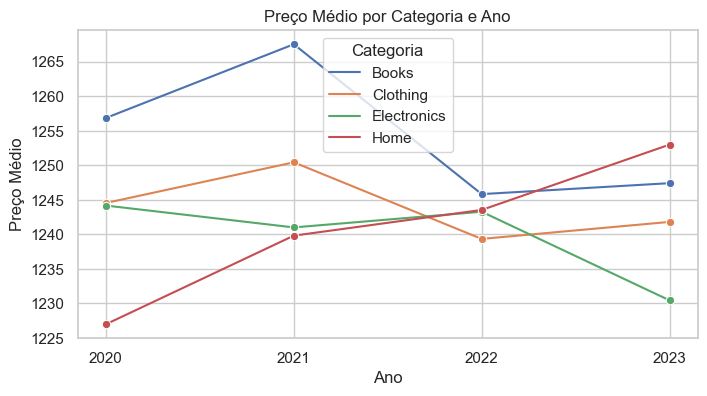

In [ ]:
most_exp_cat_by_year = purchases.groupby(['Year','Product Category'])['TotalAmount_Qtd'].mean().reset_index()

# Gráfico de linhas com as informações das vendas por ano, quantidade e categoria 
plt.figure(figsize=(8, 4))
sns.lineplot(data=most_exp_cat_by_year, x='Year', y='TotalAmount_Qtd', hue='Product Category', marker='o')

# Estilização
plt.xlabel('Ano')
plt.ylabel('Preço Médio')
plt.title('Preço Médio por Categoria e Ano')
plt.legend(title='Categoria')

# X para anos inteiros
plt.xticks(most_exp_cat_by_year['Year'].unique())

plt.show()

### Produtos com melhores/piores NPS

In [ ]:
top_nps = purchases.nlargest(5, 'NPS')
print("Melhores NPS:")
top_nps

Melhores NPS:


,Purchase Date,Product Category,Quantity,Product Price,Total Purchase Amount,NPS,data,Year,TotalAmount_Qtd
2,23/05/2022,Home,2,288,3196,10,2022-05-23,2022,1598.000000
11,18/01/2021,Books,1,348,2682,10,2021-01-18,2021,2682.000000
42,03/03/2022,Books,1,31,268,10,2022-03-03,2022,268.000000
45,30/04/2021,Clothing,3,119,3967,10,2021-04-30,2021,1322.333333
52,20/04/2020,Clothing,5,82,3439,10,2020-04-20,2020,687.800000


Representatidade do melhor NPS(10) nas vendas das categorias = 10% 

In [ ]:
best_nps = purchases[purchases['NPS'] == 10]
best_nps_cat = best_nps.groupby('Product Category')['Quantity'].sum().reset_index()

# Calculando a representatividade dos produtos com NPS = 0
merged_best_nps = pd.merge(category_qtd,best_nps_cat, on='Product Category', how='left')
merged_best_nps['Rep'] = merged_best_nps['Quantity_y'] / merged_best_nps['Quantity_x']
merged_best_nps['Rep'] = merged_best_nps['Rep'].apply(lambda x: f'{x:.2%}') # formatação de 2 vírgulas

# Renomeando as colunas
merged_best_nps.rename(columns={
    'Quantity_x': 'Vendidos',
    'Quantity_y': 'Vendidos c/ NPS=10',
    'Rep': 'Representatividade (%)'
}, inplace=True)

merged_best_nps

,Product Category,Vendidos,Vendidos c/ NPS=10,Representatividade (%)
0,Clothing,225322,20551,9.12%
1,Books,223876,20502,9.16%
2,Electronics,150828,13535,8.97%
3,Home,149698,13834,9.24%


Representatidade do pior NPS(0) nas vendas das categorias = 10%, praticamente igual os produtos com NPS=10

In [ ]:
worse_nps = purchases[purchases['NPS'] == 0]
worse_nps_cat = best_nps.groupby('Product Category')['Quantity'].sum().reset_index()

# Calculando a representatividade dos produtos com NPS = 0
worse_nps_cat = pd.merge(category_qtd,best_nps_cat, on='Product Category', how='left')
worse_nps_cat['Rep'] = worse_nps_cat['Quantity_y'] / worse_nps_cat['Quantity_x']
worse_nps_cat['Rep'] = worse_nps_cat['Rep'].apply(lambda x: f'{x:.2%}') # formatação de 2 vírgulas

# Renomeando as colunas
worse_nps_cat.rename(columns={
    'Quantity_x': 'Vendidos',
    'Quantity_y': 'Vendidos c/ NPS=0',
    'Rep': 'Representatividade (%)'
}, inplace=True)

worse_nps_cat

,Product Category,Vendidos,Vendidos c/ NPS=0,Representatividade (%)
0,Clothing,225322,20551,9.12%
1,Books,223876,20502,9.16%
2,Electronics,150828,13535,8.97%
3,Home,149698,13834,9.24%


In [ ]:
bot_nps = purchases.nsmallest(5, 'NPS')
print("Piores NPS:")
bot_nps

Piores NPS:


,Purchase Date,Product Category,Quantity,Product Price,Total Purchase Amount,NPS,data,Year,TotalAmount_Qtd
10,31/03/2021,Clothing,1,366,246,0,2021-03-31,2021,246.00
12,07/01/2020,Books,4,103,731,0,2020-01-07,2020,182.75
33,24/11/2021,Home,1,327,1496,0,2021-11-24,2021,1496.00
35,03/08/2021,Electronics,2,219,468,0,2021-08-03,2021,234.00
50,27/08/2020,Home,5,355,1799,0,2020-08-27,2020,359.80


### NPS de cada categoria
O NPS de cada categoria também está bastante distribuído, com a média próxima de 5.

Os produtos da categoria Home possuem o melhor NPS com a média igual à 5.01, enquanto Electronics possuí a menor média de 4.97.

In [ ]:
nps_mean = purchases['NPS'].mean()
print(f'A média geral de NPS é igual à {nps_mean:.2f}')

A média geral de NPS é igual à 4.99


In [ ]:
nps_cat_mean = purchases.groupby('Product Category')['NPS'].mean().sort_values(ascending=False).reset_index()
nps_cat_mean

,Product Category,NPS
0,Home,5.011394
1,Books,5.003698
2,Clothing,4.983904
3,Electronics,4.966544


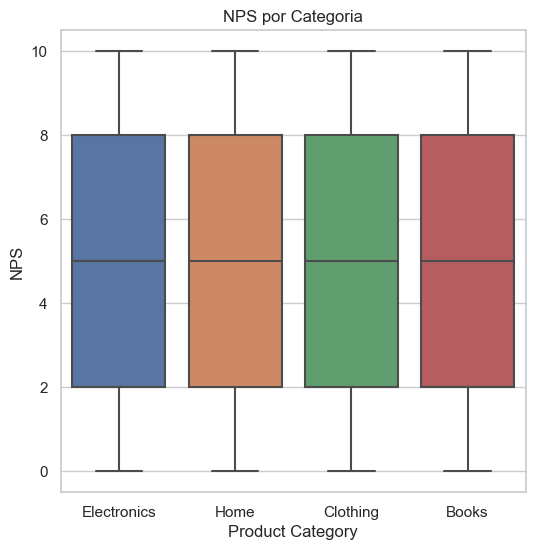

In [ ]:
# Gráfico de distribuição do NPS
sns.set_theme(style="whitegrid")

# boxplot para os preços das categorias
plt.figure(figsize=(6, 6))
sns.boxplot(x='Product Category', y='NPS', data=purchases)

# Estilização
plt.title('NPS por Categoria')
plt.xlabel('Product Category')
plt.ylabel('NPS')

# Exibir o gráfico
plt.show()

## Análise de canal e público para cada categoria de produto
Qual a melhor canal e público para cada categoria?

Público:

A idade e o gênero do público geral é bem distribuída, com a média de idade igual à 43 anos e a representatividade de ambos os gêneros aproxima-se de 50%.

Vendas por Canais:

Ao longo dos anos, as vendas diminuíram, mas a proporção de vendas por canal permaneceu estável. Entre os diferentes canais, as campanhas no Instagram se destacaram como o melhor meio para promover os produtos nas quatro categorias, devido aos seus maiores números de vendas.

Conclusão:
- Deve-se focar nas vendas dos produtos de 'Clothing' e 'Books', pois são os produtos com as maiores médias de preço e vendas;
- Promovê os produtos em Campanhas do Instagram, porque representam o maior canal de vendas;
- Instigar campanhas para jovens entre 18 e 35, porque representam a maior faixa etária consumidora entre todas categorias.

In [ ]:
publico = dataset[['Purchase Date','Product Category','Quantity', 'Total Purchase Amount', 'NPS', 'Customer Age ', 'Gender', 'Source', 'Year']]
publico.head(3)

,Purchase Date,Product Category,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Year
0,08/09/2020,Electronics,3,740,7,20,Male,Instagram Campign,2020
1,05/03/2022,Home,4,2739,8,20,Male,Instagram Campign,2022
2,23/05/2022,Home,2,3196,10,20,Male,SEM,2022


A seguir é exibido a distribuição equivalente de idade e gênero nas vendas.

<Axes: xlabel='Customer Age ', ylabel='Count'>

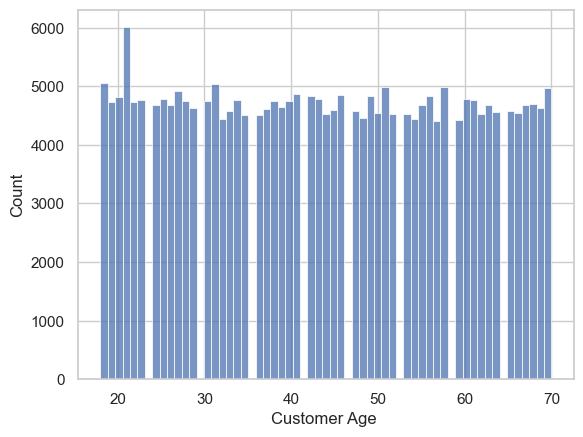

In [ ]:
sns.histplot(publico['Customer Age '])

Text(0.5, 1.0, 'Frequência Gênero nas Vendas')

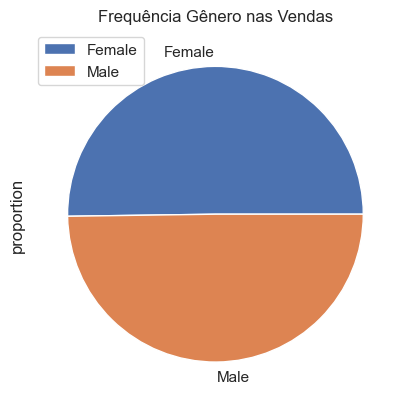

In [ ]:
fr_gender = publico['Gender'].value_counts(normalize=True)
fr_gender.plot.pie(legend=True).set_title("Frequência Gênero nas Vendas")

A seguir é exibido a distribuição de idade e gênero por categoria.

In [ ]:
media_idade_cat = publico.groupby('Product Category')['Customer Age '].mean().reset_index()
media_idade_cat

,Product Category,Customer Age
0,Books,43.790514
1,Clothing,43.679329
2,Electronics,43.834154
3,Home,43.757076


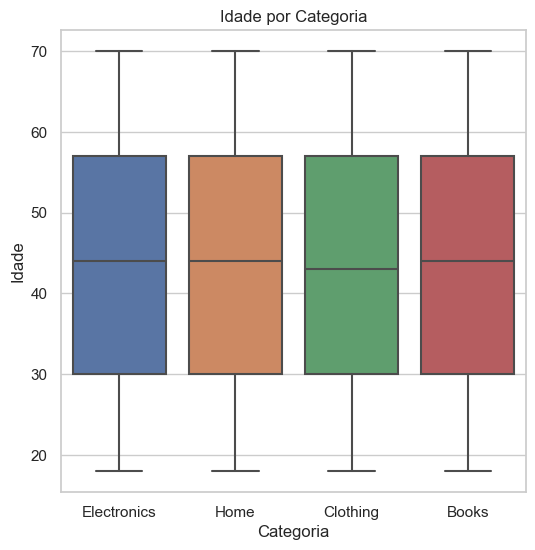

In [ ]:
# Gráfico de distribuição do Idade do Público
# boxplot para as idades do público
plt.figure(figsize=(6, 6))
sns.boxplot(x='Product Category', y='Customer Age ', data=publico)

# Estilização
plt.title('Idade por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Idade')

# Exibir o gráfico
plt.show()

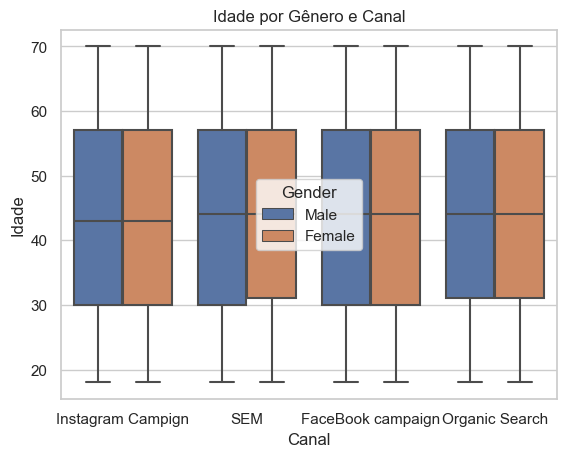

In [ ]:
# Boxplot de idade por gênero e canal de venda
sns.boxplot(data=publico, x='Source', y='Customer Age ', hue='Gender')
plt.title('Idade por Gênero e Canal')
plt.xlabel('Canal')
plt.ylabel('Idade')
plt.show()

Contagem de Vendas para cada Canal

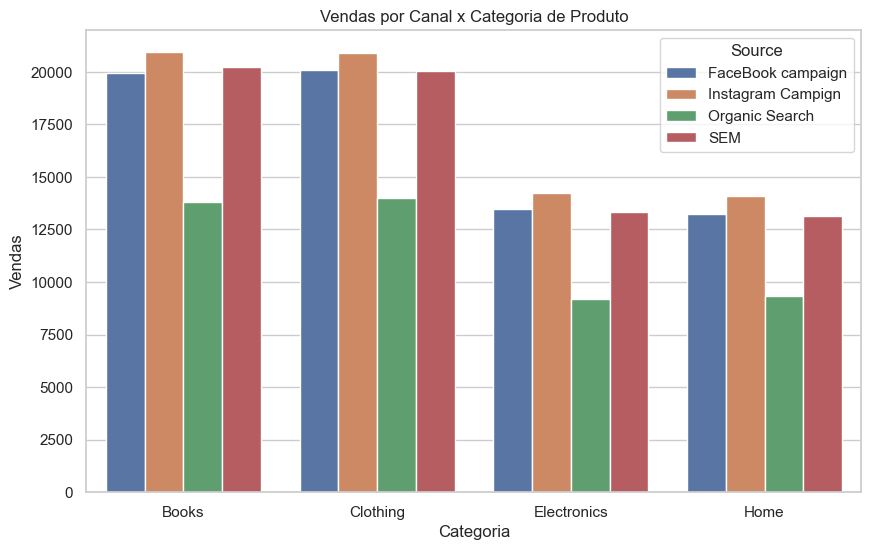

In [ ]:
# Contar os valores da coluna 'Source' para cada 'Categoria'
source_cat = publico.groupby(['Product Category', 'Source']).size().unstack(fill_value=0).reset_index()
source_cat_melted = source_cat.melt(id_vars='Product Category', var_name='Source', value_name='Count')

# Gráfico de Barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Count', hue='Source', data=source_cat_melted)

# Adicionar títulos e rótulos
plt.title('Vendas por Canal x Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Vendas')

# Exibir o gráfico
plt.show()

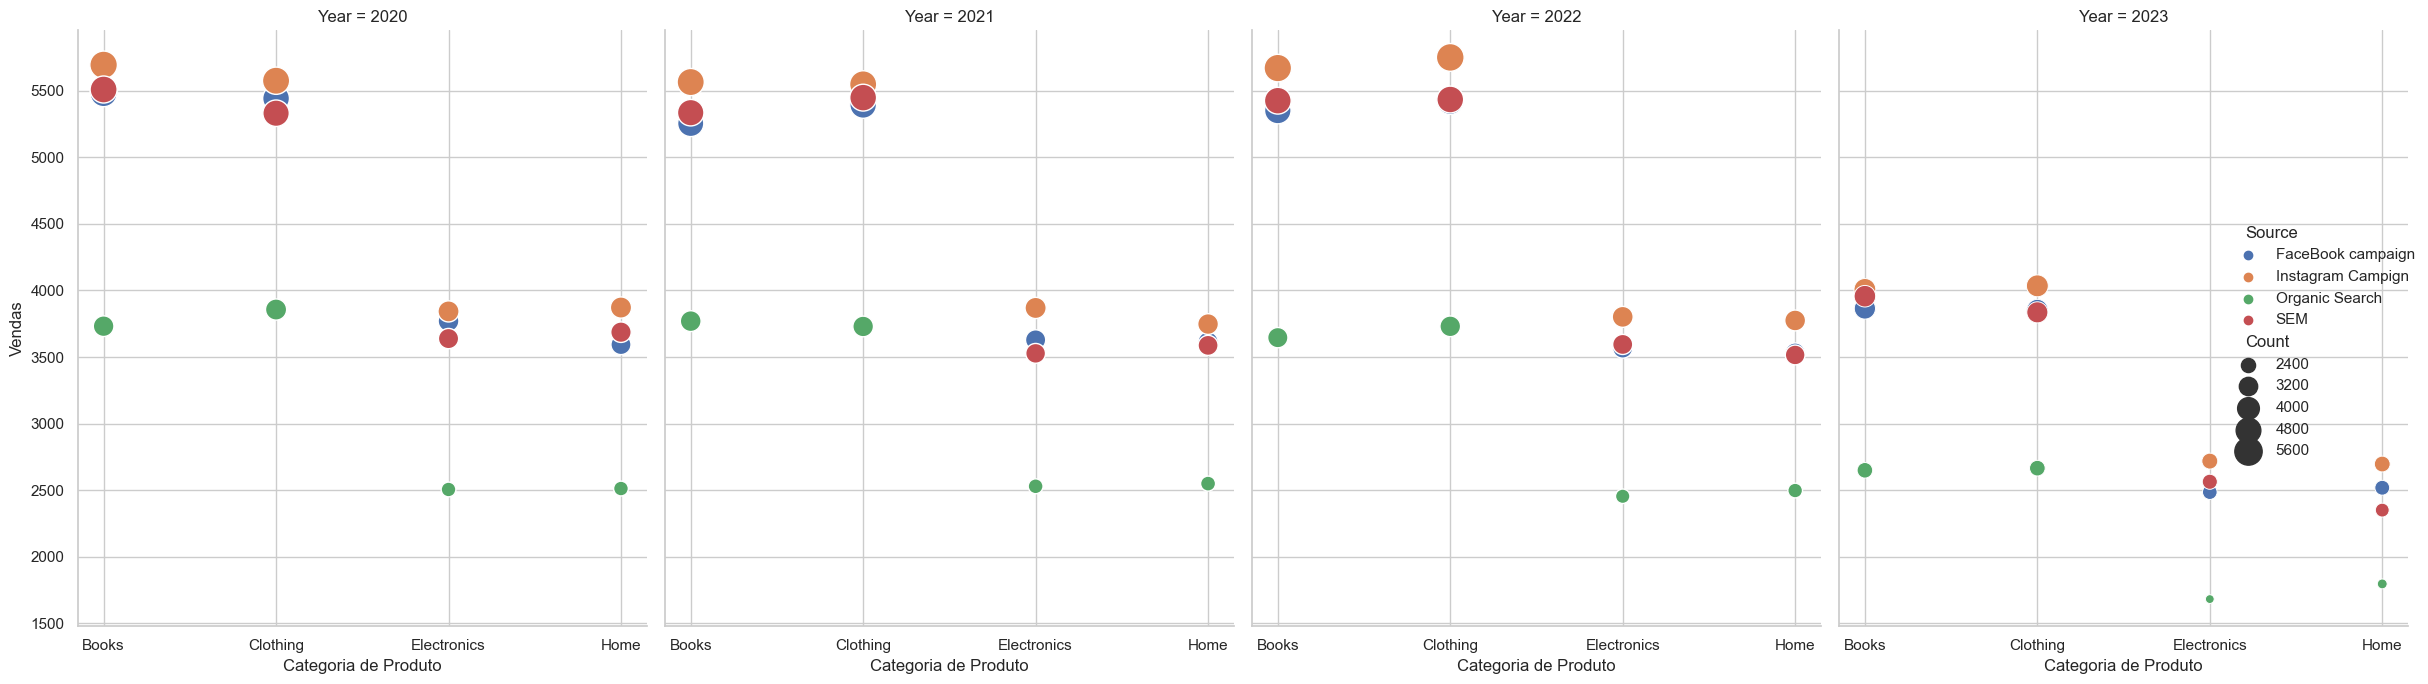

In [ ]:
# Agrupamento de categoria, ano e canal
src_cat_yr = publico.groupby(['Product Category', 'Year', 'Source']).size().unstack(fill_value=0).reset_index()
src_cat_yr_melted = src_cat_yr.melt(id_vars=['Product Category', 'Year'], var_name='Source', value_name='Count')

# Plot
g = sns.relplot(
    data=src_cat_yr_melted,
    x="Product Category", y="Count", hue="Source", size="Count",
    col="Year", kind="scatter", height=7, aspect=0.8, sizes=(40, 400)
)

# Estilização
g.set_axis_labels('Categoria de Produto', 'Vendas')
plt.tight_layout()

plt.show()

A seguir foi calculada a correlação entre as três variáveis de vendas e público (canal, idade e gênero)

Os valores resultantes aproximam-se de 0, o que significa que não uma relação linear entre elas, o que as tornam independentes entre si.

In [ ]:
chan_cor = publico
chan_cor['Gender_num'] = chan_cor['Gender'].map({'Male': 0, 'Female': 1})
chan_cor['Source_num'] = chan_cor['Source'].astype('category').cat.codes

# Calculando correlação entre as três variáveis
correlation = chan_cor[['Customer Age ', 'Gender_num', 'Source_num']].corr()
print(correlation)

               Customer Age   Gender_num  Source_num
Customer Age        1.000000    0.000547    0.000997
Gender_num          0.000547    1.000000    0.000832
Source_num          0.000997    0.000832    1.000000


C:\Users\55119\AppData\Local\Temp\ipykernel_20492\3387317649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chan_cor['Gender_num'] = chan_cor['Gender'].map({'Male': 0, 'Female': 1})
C:\Users\55119\AppData\Local\Temp\ipykernel_20492\3387317649.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chan_cor['Source_num'] = chan_cor['Source'].astype('category').cat.codes


In [ ]:
# Contagem de clientes por faixa etária, gênero e canal de venda
chan_cor['Age Group'] = pd.cut(chan_cor['Customer Age '], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])
# print(chan_cor.groupby(['Age Group', 'Gender', 'Source']).size())

C:\Users\55119\AppData\Local\Temp\ipykernel_20492\1959851225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chan_cor['Age Group'] = pd.cut(chan_cor['Customer Age '], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])


Foi criado um heatmap a seguir para identificar o melhor público e canal para cada tipo de produto, e observou-se que a maior parte das vendas ocorre em decorrência das Campanhas do Instagram para jovens(ambos gêneros) entre 18 e 35 anos.

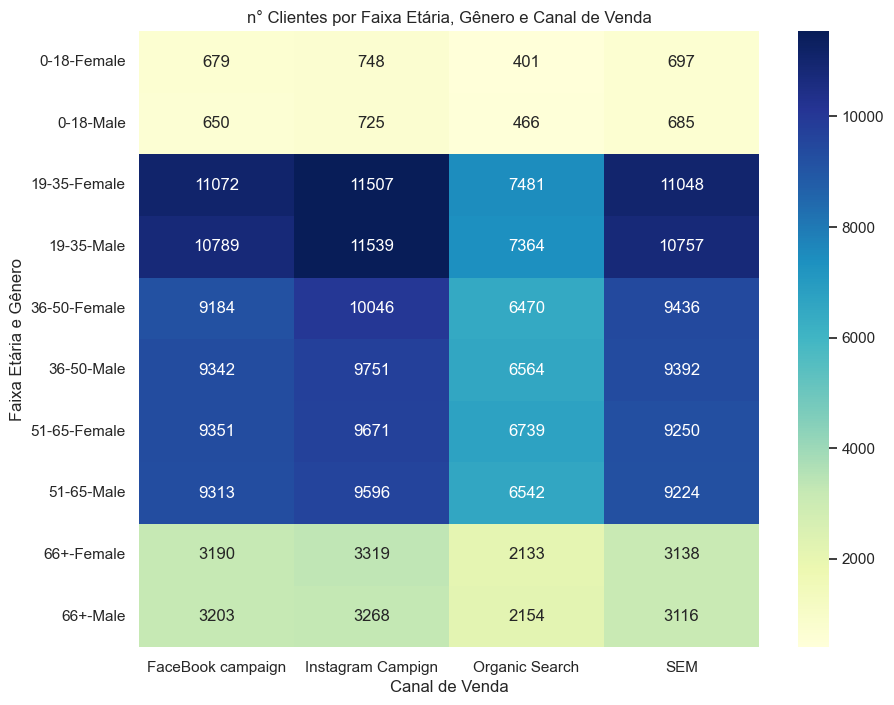

In [ ]:
# Tabela de contigência para heatmap
age_gender_source_count = chan_cor.groupby(['Age Group', 'Gender', 'Source']).size().reset_index(name='Count')
heatmap_data = age_gender_source_count.pivot_table(index=['Age Group', 'Gender'], columns='Source', values='Count', fill_value=0)

# Heatmap entre clientes por faixa etária, gênero e canal de venda
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('n° Clientes por Faixa Etária, Gênero e Canal de Venda')
plt.ylabel('Faixa Etária e Gênero')
plt.xlabel('Canal de Venda')
plt.show()